In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [68]:
def get_norm_hist(img, bin_size=256):
    temp_hist = cv2.calcHist([img], [0, 1, 2], None, [bin_size, bin_size, bin_size], [0,256, 0,256, 0,256])
    hist = cv2.normalize(temp_hist, temp_hist).flatten()
    return hist

Image 1 shape: (256, 320, 3)
Image 2 shape: (256, 320, 3)
Image 3 shape: (256, 324, 3)


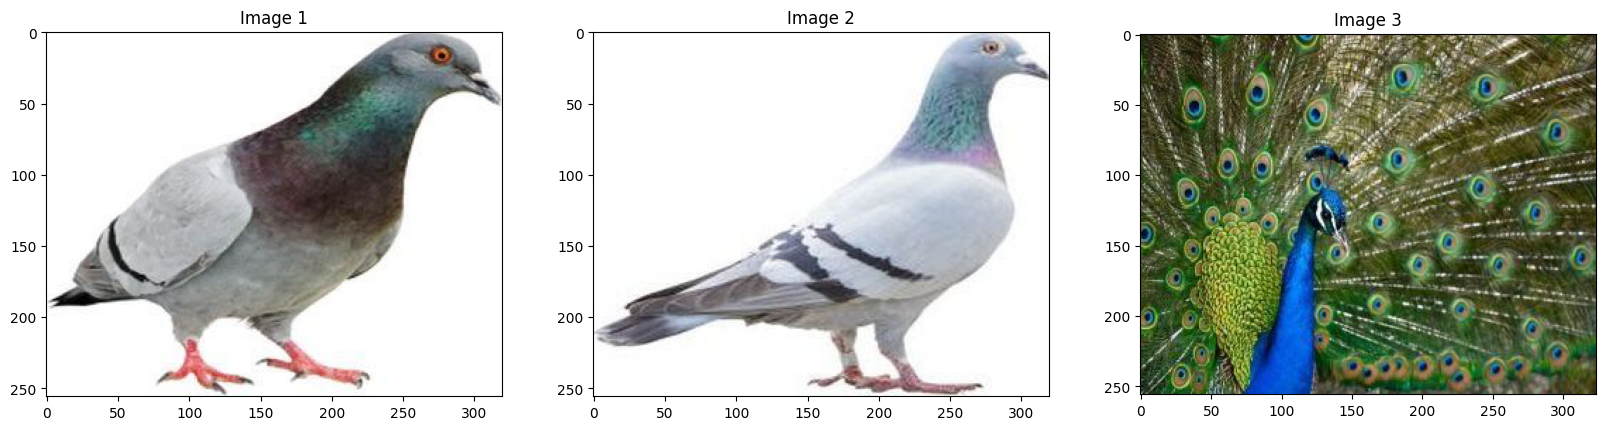

In [76]:
query_img = cv2.imread('queryimage.png')
ref_img_1 = cv2.imread('refimage1.png')
ref_img_2 = cv2.imread('refimage2.png')

images = [query_img, ref_img_1, ref_img_2]

for i in range(3):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    print(f"Image {i+1} shape: {images[i].shape}")

plt.figure(figsize=(20,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i])
    plt.title(f"Image {i+1}")
plt.show()

In [77]:
hists = [get_norm_hist(img) for img in images]

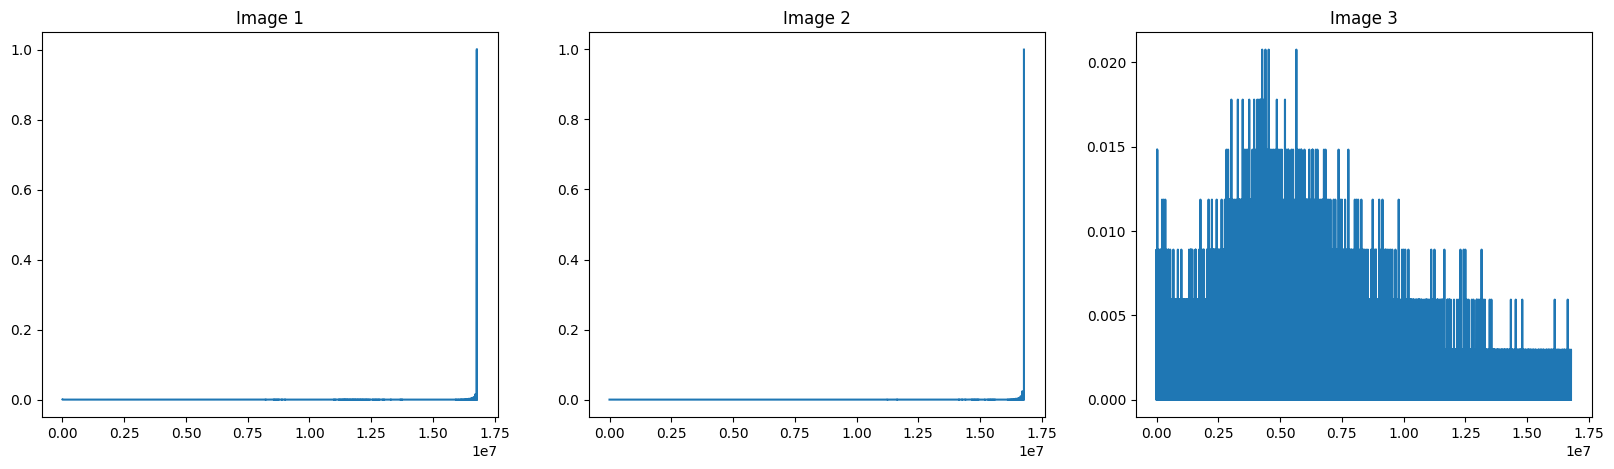

In [78]:
plt.figure(figsize=(20,5))
for i in range(len(hists)):
    plt.subplot(1,3,i+1)
    plt.plot(hists[i])
    plt.title(f"Image {i+1}")
plt.show()

In [79]:
dists = [cv2.compareHist(hists[0], hists[i], cv2.HISTCMP_BHATTACHARYYA) for i in range(1,3)]

In [80]:
print(f"Distance between query image and reference image 1: {dists[0]}")
print(f"Distance between query image and reference image 2: {dists[1]}")

Distance between query image and reference image 1: 0.595285678267041
Distance between query image and reference image 2: 0.9976101578007563
